In [1]:
# loading libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

Let's  have a look in the layoffs in the tech world in 2024 in comparison of the years before.

First step loading the data

In [2]:
data = pd.read_csv("/kaggle/input/tech-layoffs-2020-2024/tech_layoffs_til_Q4_2024.csv", delimiter=";")

# print(data.head)

print(data.columns)

Index(['Nr', 'Company', 'Location_HQ', 'Region', 'USState', 'Country',
       'Continent', 'Laid_Off', 'Date_layoffs', 'Percentage',
       'Company_Size_before_Layoffs', 'Company_Size_after_layoffs', 'Industry',
       'Stage', 'Money_Raised_in__mil', 'Year', 'latitude', 'longitude'],
      dtype='object')


In [3]:
summary = pd.DataFrame({
    'Non-NA Count': data.count(),
    'NA Count': data.isna().sum()
})
print(summary)


                             Non-NA Count  NA Count
Nr                                   2078         0
Company                              2078         0
Location_HQ                          2078         0
Region                                544      1534
USState                              1422       656
Country                              2078         0
Continent                            2078         0
Laid_Off                             1816       262
Date_layoffs                         2078         0
Percentage                           1810       268
Company_Size_before_Layoffs          1660       418
Company_Size_after_layoffs           1593       485
Industry                             2078         0
Stage                                2078         0
Money_Raised_in__mil                 1895       183
Year                                 2078         0
latitude                             2078         0
longitude                            2078         0


In [4]:
# Drop rows with NaN in 'Laid_Off' column
data_cleaned = data.dropna(subset=['Laid_Off'])

# Verify the cleaned data
print(data_cleaned.shape)  # Check rows and columns

# Count non-NA values in the cleaned data
non_na_counts = data_cleaned.count()
print(non_na_counts)


(1816, 18)
Nr                             1816
Company                        1816
Location_HQ                    1816
Region                          494
USState                        1227
Country                        1816
Continent                      1816
Laid_Off                       1816
Date_layoffs                   1816
Percentage                     1659
Company_Size_before_Layoffs    1660
Company_Size_after_layoffs     1593
Industry                       1816
Stage                          1816
Money_Raised_in__mil           1692
Year                           1816
latitude                       1816
longitude                      1816
dtype: int64


In [5]:
sum_laid_off = data_cleaned['Laid_Off'].sum()
print(sum_laid_off)

# Group by 'Year' and sum 'Laid_Off'
sum_laid_off_per_year = data_cleaned.groupby('Year')['Laid_Off'].sum()
print(sum_laid_off_per_year)

546364.0
Year
2020     61529.0
2021      6790.0
2022    127577.0
2023    176946.0
2024    173522.0
Name: Laid_Off, dtype: float64


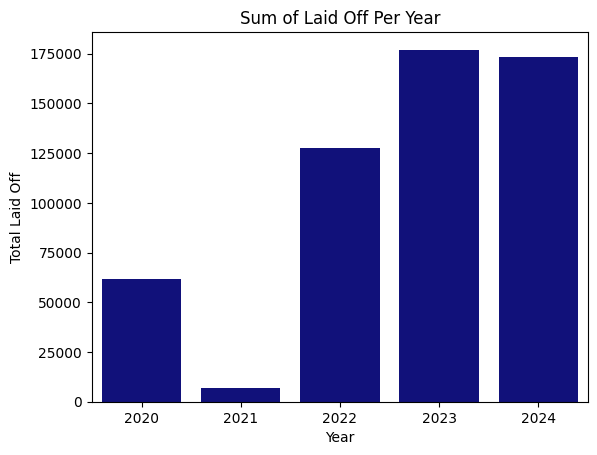

In [6]:
# Group by 'Year' and sum 'Laid_Off'
sum_laid_off_per_year = data_cleaned.groupby('Year')['Laid_Off'].sum()

# Create a bar chart using Seaborn
sns.barplot(x=sum_laid_off_per_year.index, y=sum_laid_off_per_year.values, color='darkblue')

# Add titles and labels
plt.title('Sum of Laid Off Per Year')
plt.xlabel('Year')
plt.ylabel('Total Laid Off')

# Show the plot
plt.show()

Layoffs in tech were in 2024 still high with 173.522, but not as high as in 2023.

In [7]:
# Group by 'Year' and 'Country' and sum 'Laid_Off'
sum_laid_off_per_year_country = data_cleaned.groupby(['Year', 'Country'])['Laid_Off'].sum().reset_index()

print(sum_laid_off_per_year_country)

     Year    Country  Laid_Off
0    2020  Australia      96.0
1    2020     Brazil    1227.0
2    2020     Canada     982.0
3    2020    Estonia      63.0
4    2020    Germany     331.0
..    ...        ...       ...
100  2024      Spain      54.0
101  2024     Sweden    1990.0
102  2024         UK    5639.0
103  2024        USA  120529.0
104  2024    Uruquay     104.0

[105 rows x 3 columns]


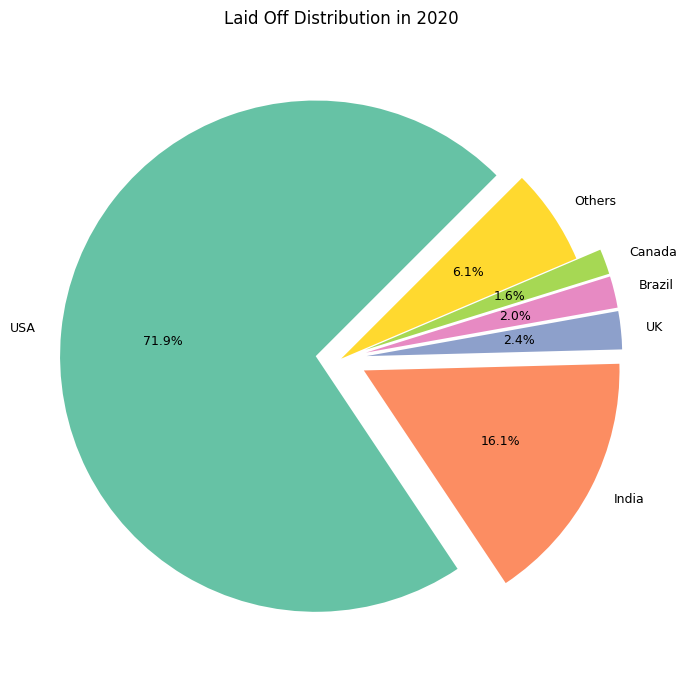

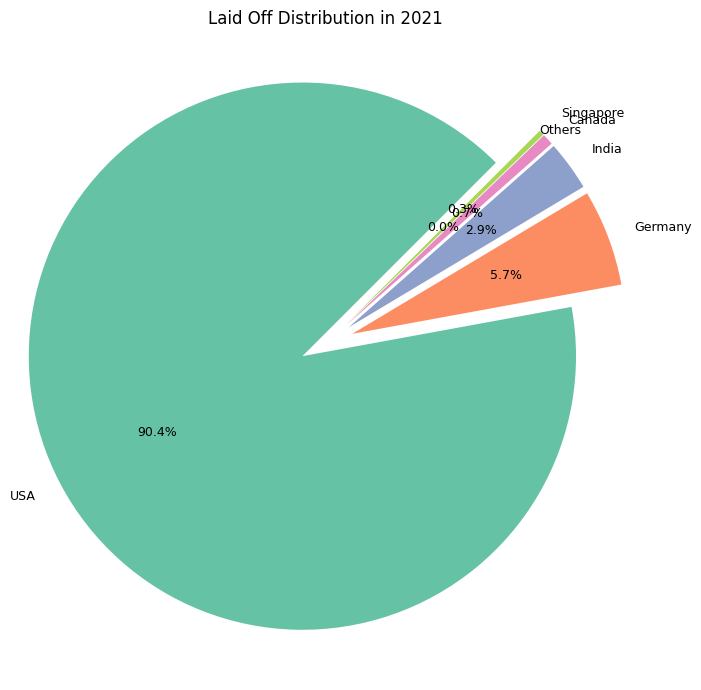

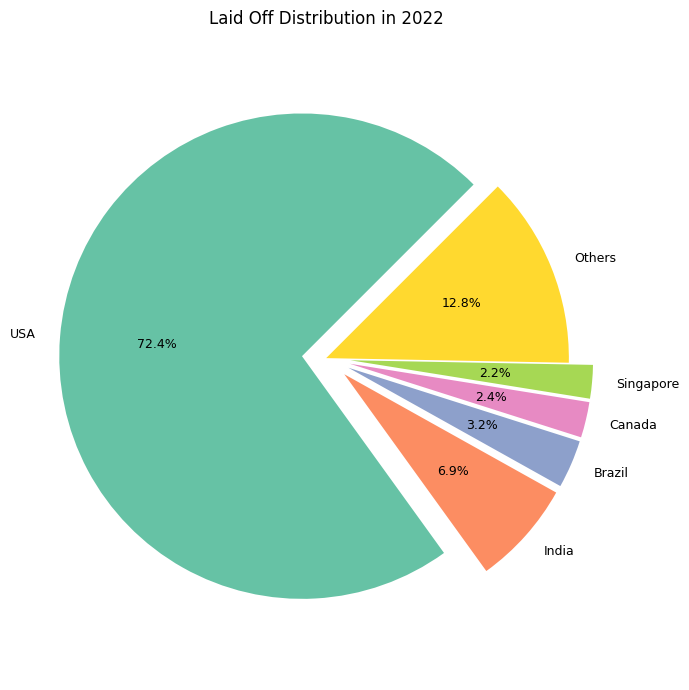

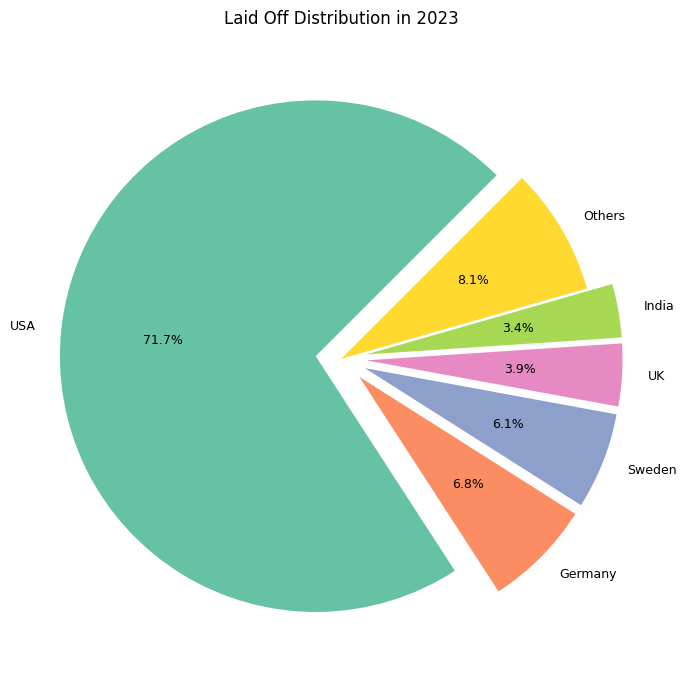

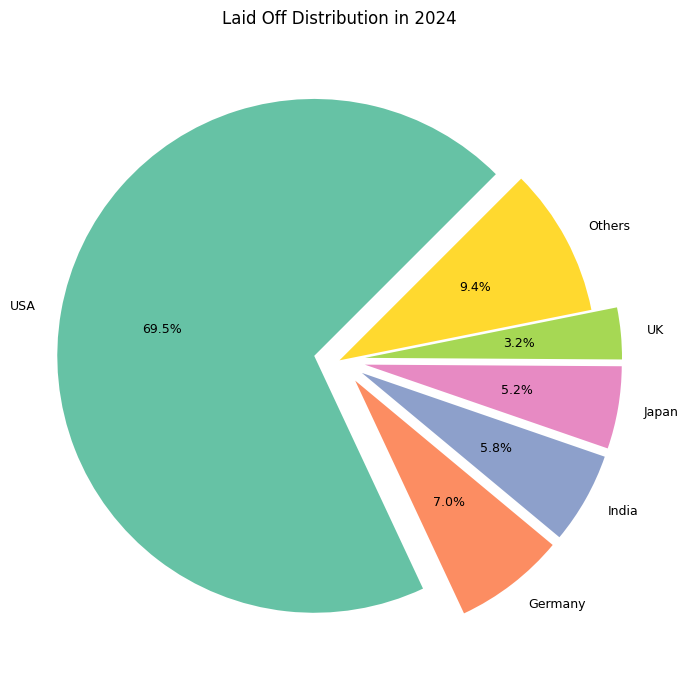

In [8]:
# Group by 'Year' and 'Country' and sum 'Laid_Off'
sum_laid_off_per_year_country = data_cleaned.groupby(['Year', 'Country'])['Laid_Off'].sum().reset_index()

# Get unique years
years = sum_laid_off_per_year_country['Year'].unique()

# Create a pie chart for each year
for year in years:
    # Filter data for the specific year
    year_data = sum_laid_off_per_year_country[sum_laid_off_per_year_country['Year'] == year]
    
    # Sort the data by 'Laid_Off' and get top 5 countries
    top_countries = year_data.nlargest(5, 'Laid_Off')
    
    # Get the remaining countries and sum their 'Laid_Off' values into "Others"
    others_sum = year_data[~year_data['Country'].isin(top_countries['Country'])]['Laid_Off'].sum()
    others = pd.DataFrame({'Country': ['Others'], 'Laid_Off': [others_sum]})
    
    # Combine top countries with "Others"
    final_data = pd.concat([top_countries, others])
    
    # Use Seaborn 'Set1' color palette
    colors = sns.color_palette('Set2', len(final_data))
    
    # Define 'explode' to slightly separate the largest slices (e.g., the top 5 countries)
    explode = [0.1 if country != 'Others' else 0 for country in final_data['Country']]

    # Plot the pie chart
    plt.figure(figsize=(7, 7))
    wedges, texts, autotexts = plt.pie(final_data['Laid_Off'], labels=final_data['Country'], autopct='%1.1f%%', 
                                       startangle=45, colors=colors, explode=explode, labeldistance=1.1)

    # Adjust label font size
    for text in texts + autotexts:
        text.set_fontsize(9)

    plt.title(f'Laid Off Distribution in {year}')
    plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
    
    # Ensure the layout is adjusted so labels don't overlap
    plt.tight_layout()
    plt.show()